Adapted from Applied Data Science with Python from Coursera. Here, I use a CSV of temperature readings near the Ann Arbor area. Using matplotlib, I graph 2005-2014 temperature highs and lows as line graphs, and then overlay a scatterplot of temperature extremes in 2015 that are higher/lower than the 2005-2014 highs/lows.

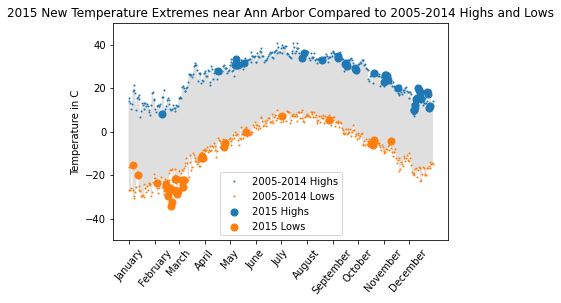

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
for i in df.index:
    if re.match(r"20[0-9][0-9]-02-29", df['Date'][i]):
        df.drop(i, axis=0,inplace=True)
df.sort_values(by=['Date', 'ID'], axis=0,ascending=True, inplace=True)
df1 = df.copy()
df2 = df.copy()
df1 = df[df['Date'] >= '2015-01-01']
df2 = df[df['Date'] < '2015-01-01']


df_day = df2.groupby(df2['Date'].str.extract(r"^20[0-1][0-9]-(.*)$")[0]).agg({"Data_Value":(np.amax,np.amin)})
df_day2015 = df1.groupby(df1['Date'].str.extract(r"^20[0-1][0-9]-(.*)$")[0]).agg({"Data_Value":(np.amax,np.amin)})
max_2015 = []
min_2015 = []
for i in df_day2015.index:
    if df_day2015['Data_Value','amax'][i] > df_day['Data_Value','amax'][i]:
        max_2015.append(df_day2015['Data_Value','amax'][i]/10.0)
    else:
        max_2015.append(np.NaN)
for i in df_day2015.index:
    if df_day2015['Data_Value','amin'][i] < df_day['Data_Value','amin'][i]:
        min_2015.append(df_day2015['Data_Value','amin'][i]/10.0)
    else:
        min_2015.append(np.NaN)
x_axis_list = []
from datetime import datetime
for i in df_day.index:
    x_axis_list.append(datetime.strptime(i, '%m-%d').timetuple().tm_yday)
maxarray = np.array(df_day['Data_Value','amax']/10.0)
minarray = np.array(df_day['Data_Value','amin']/10.0)
plt.figure()
a = plt.plot(maxarray, '.', markersize=2, label = '2005-2014 Highs')
b = plt.plot(minarray, '.', markersize=2, label = '2005-2014 Lows')
plt.gca().fill_between(range(len(maxarray)), 
                       maxarray, minarray, 
                       facecolor='grey', 
                       alpha=0.25)
plt.xticks([1, 32, 60,91,121,152,182,213,244,274,305,335],['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xticks(rotation=50)
plt.title('2015 New Temperature Extremes near Ann Arbor Compared to 2005-2014 Highs and Lows')
plt.ylabel('Temperature in C')
x = plt.scatter(x_axis_list, max_2015, s=50)
y = plt.scatter(x_axis_list, min_2015, s=50)
x.set_label('2015 Highs')
y.set_label('2015 Lows')
plt.ylim([-50, 50])
ax = plt.gca()
ax.legend()